In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("advertising.csv")   #,index_col=0

In [26]:
data.head()               # Default head() value is 5 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
# Liner Regression

In [17]:
# 1 assumption checking:
    # 1 linearity
    # 2. no multi-colinearity
    # 3. Auto correlation
    # 4. No outlier
    # 5. No null values
    # char to numbers -NA


In [18]:
# 1 linearity : linear relation between independent variable and dependent variable. 
# This relation good for linear regression and we check this condition using scatter chart

In [31]:
column_a = data["TV"]
column_b = data["Radio"]
column_c = data["Newspaper"]
column_d = data["Sales"]

Text(0, 0.5, 'Sales')

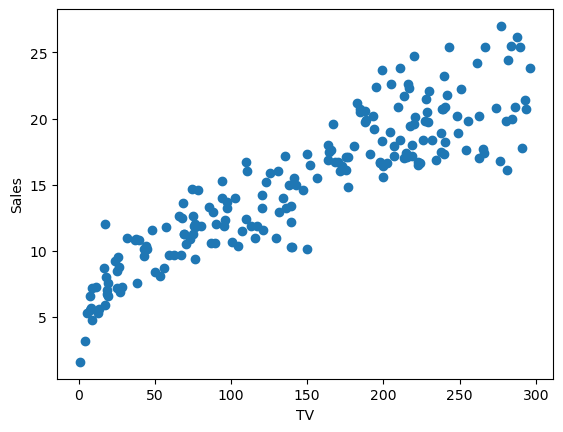

In [32]:
plt.scatter(column_a,column_d)
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

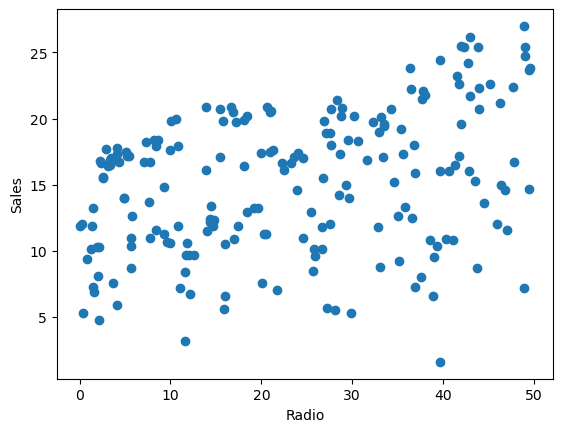

In [33]:
plt.scatter(column_b,column_d)
plt.xlabel("Radio")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

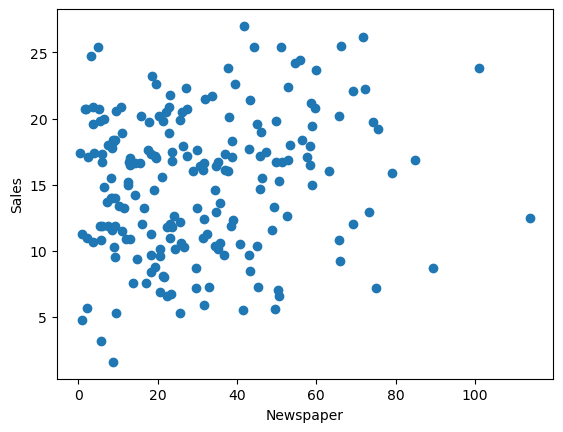

In [34]:
plt.scatter(column_c,column_d)
plt.xlabel("Newspaper")
plt.ylabel("Sales")

<Axes: >

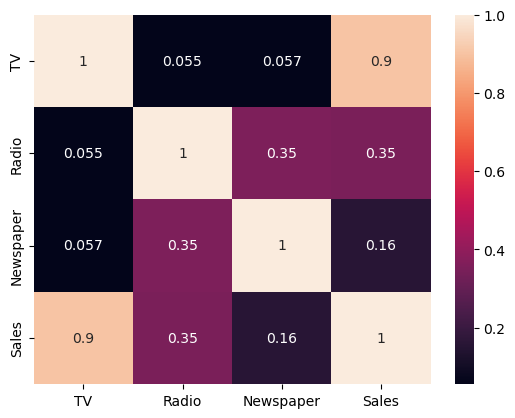

In [46]:
sns.heatmap(data.corr(),annot=True)     # co-rellation thresold is  -0.1 to +0.1 anything between this is no correalated, 
#correaltion range is -1 to +1 , 

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc6dd30ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc6dd32750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc6dd30350>,
 'medians': [<matplotlib.lines.Line2D at 0x1dc6dd33d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dc6d56c810>,
 'means': []}

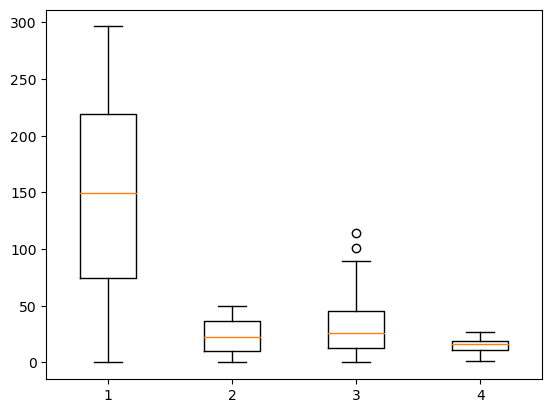

In [39]:

plt.boxplot(data)


In [41]:
data_new = data[column < 90]

NameError: name 'column' is not defined

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc6ddf6e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc6ddf8110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc6ddf6450>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc6ddf9510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc6ddfa150>],
 'means': []}

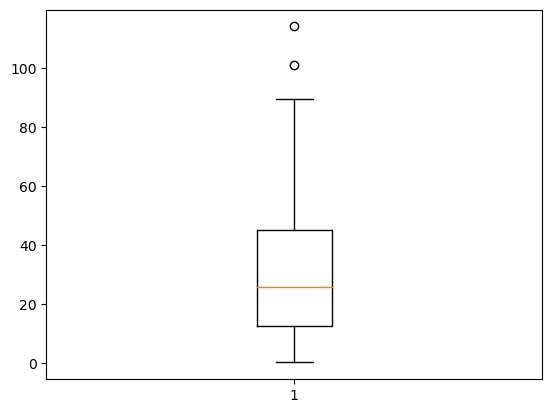

In [42]:
column = data["Newspaper"]
plt.boxplot(column)

In [43]:
data_new = data[column < 90]

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc6def4c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc6def6410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc6def41d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1dc6def7a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dc6defc510>,
 'means': []}

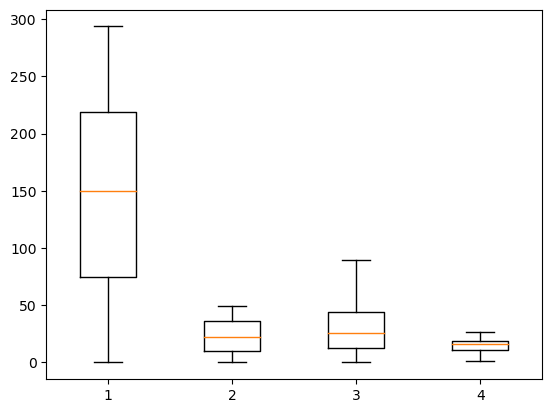

In [45]:

plt.boxplot(data_new)


In [47]:
# Null valuse present in more than 20 % then drop valuse and 
#if it is less than 20 % then fill the value with mean,median and mode.

data.isnull().sum()

# data[column_name].fillna(data["column"].mean(),inplace=True)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [49]:
# Linear regression
x = data_new[['TV','Radio','Newspaper']]    # two brackedt use due to multiple varaible has provided
y = data_new[['Sales']]

In [53]:
data_new.shape

(198, 4)

In [51]:
x.shape

(198, 3)

In [52]:
y.shape

(198, 1)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)   # test data size is 20 %


In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158, 1)
(40, 1)


In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [58]:
lm.fit(x_train,y_train)

LinearRegression()

In [59]:
# y = b0 + b1x1 + b2x2 + b3x3


In [60]:
print(lm.coef_)

[[0.05366347 0.10238806 0.00195067]]


In [61]:
print(lm.intercept_)

[4.70213794]


In [62]:
x1 =250
x2= 14
x3 = 67

y = 2.85645114 + (0.04713151*x1)+(0.17860138*x2)+(0.00258433*x3)

In [63]:
y

17.31289807

In [64]:
y_pred = lm.predict(x_test)

In [65]:
y_pred

array([[20.88427161],
       [16.71549604],
       [16.71666646],
       [ 8.07166012],
       [12.41864693],
       [ 6.45486735],
       [11.57928804],
       [10.64029373],
       [18.73497304],
       [17.25843032],
       [17.0105659 ],
       [21.86119546],
       [17.71938019],
       [15.71226665],
       [16.3700036 ],
       [ 9.81726325],
       [ 8.76492833],
       [13.26044822],
       [ 8.05174372],
       [15.67590592],
       [24.35053002],
       [15.16526465],
       [21.16638485],
       [12.99843182],
       [21.48030067],
       [21.60859963],
       [16.31655667],
       [ 6.99018608],
       [ 9.35888167],
       [11.07989772],
       [ 8.60890515],
       [21.05535676],
       [11.45578786],
       [17.1748944 ],
       [20.73847915],
       [20.35908329],
       [16.58149487],
       [20.00814634],
       [11.19195655],
       [20.66174083]])

In [66]:
new_df = pd.DataFrame()
new_df = x_test
new_df['actual sales']= y_test
new_df['predicted sales']= y_pred
new_df


,TV,Radio,Newspaper,actual sales,predicted sales
69,216.8,43.9,27.2,22.3,20.884272
162,188.4,18.1,25.6,19.9,16.715496
43,206.9,8.4,26.4,17.9,16.716666
78,5.4,29.9,9.4,5.3,8.071660
115,75.1,35.0,52.7,12.6,12.418647
91,28.6,1.5,33.0,7.3,6.454867
80,76.4,26.7,22.3,11.8,11.579288
125,87.2,11.8,25.9,10.6,10.640294
23,228.3,16.9,26.2,20.5,18.734973
163,163.5,36.8,7.4,18.0,17.258430


In [67]:
lm.score(x_train,y_train)*100

89.1795950015365

In [68]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 0.9298722165528027
RMSE: 1.4456040708438014


In [69]:
import joblib

In [71]:
joblib.dump(lm,"model.pkl")

['model.pkl']